In [22]:
# Importation de biblioteques
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(25,10)})
from IPython.display import Image


In [2]:
df_flight = pd.read_csv("../data/flights.csv")

C:\Users\debgn\AppData\Local\Temp\ipykernel_9580\2533705249.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flight = pd.read_csv("../data/flights.csv")


In [3]:
df_flight.head(1)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df=df_flight[['MONTH','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT', 'DEPARTURE_TIME','DEPARTURE_DELAY','SCHEDULED_TIME','CANCELLATION_REASON','DIVERTED','CANCELLED',
                     'SCHEDULED_ARRIVAL','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','ARRIVAL_DELAY']]

# 1-Cleaning

### 1.1- les valeur manquantes

In [5]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filtrer uniquement les colonnes avec des NaN
print(missing_values)


DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
SCHEDULED_TIME               6
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
ARRIVAL_DELAY           105071
dtype: int64


In [6]:
# Liste des colonnes à analyser
columns = [
    'AIR_SYSTEM_DELAY', 
    'SECURITY_DELAY', 
    'AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 
    'WEATHER_DELAY'
]

# Calcul et affichage du pourcentage de valeurs non-NaN et non nulles
for col in columns:
    total_count = len(df)  # Nombre total de lignes
    valid_count_sum = df[col].notna().sum()  # Total des valeurs valides
    percentage_valid = (valid_count_sum / total_count) * 100  # Pourcentage
    print(f"Le pourcentage de valeurs non nulles pour la variable {col} est : {percentage_valid:.2f}%")


Le pourcentage de valeurs non nulles pour la variable AIR_SYSTEM_DELAY est : 18.28%
Le pourcentage de valeurs non nulles pour la variable SECURITY_DELAY est : 18.28%
Le pourcentage de valeurs non nulles pour la variable AIRLINE_DELAY est : 18.28%
Le pourcentage de valeurs non nulles pour la variable LATE_AIRCRAFT_DELAY est : 18.28%
Le pourcentage de valeurs non nulles pour la variable WEATHER_DELAY est : 18.28%


Nous remarquons que ces variables possedent enormement de **valeur manquante**, mais un autre constant est que Les valeurs manquantes apparaissent surtout lorsque, logiquement, une compagnie aérienne n'est pas responsable d'un retard. Ces données manquantes ne reflètent donc pas un problème de qualité des données, mais simplement le fait qu'aucun événement lié à ces retards n'a eu lieu. On peut le vérifier en regardant un exemple : quand une caractéristique de retard est activée, toutes les autres sont définies à "0.0".

In [7]:
# afficher les colonnes sélectionnées où AIRLINE DELAY n'est pas nul
df.loc[df['AIRLINE_DELAY'].notnull(), ['AIRLINE_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']].head()

,AIRLINE_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,0.0,25.0,0.0,0.0,0.0
30,0.0,43.0,0.0,0.0,0.0
35,15.0,0.0,0.0,0.0,0.0
50,0.0,20.0,0.0,0.0,0.0
52,85.0,0.0,0.0,0.0,0.0


Il est tout à fait logique de remplacer les données manquantes (NaN) par "0.0" des variables 

- <span style="color:blue;">*AIR_SYSTEM_DELAY*</span> 
- <span style="color:blue;">*SECURITY_DELAY*</span> 
- <span style="color:blue;">*AIRLINE_DELAY*</span> 
- <span style="color:blue;">*LATE_AIRCRAFT_DELAY*</span> .
- <span style="color:blue;">*WEATHER_DELAY*</span> 

car elles indiquent simplement qu'il n'y a eu aucun événement lié à ces données qui ait causé un retard sur le vol.

In [8]:
df['AIRLINE_DELAY'] = df['AIRLINE_DELAY'].fillna(0)
df['AIR_SYSTEM_DELAY'] = df['AIR_SYSTEM_DELAY'].fillna(0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)

C:\Users\debgn\AppData\Local\Temp\ipykernel_9580\3117161740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AIRLINE_DELAY'] = df['AIRLINE_DELAY'].fillna(0)
C:\Users\debgn\AppData\Local\Temp\ipykernel_9580\3117161740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AIR_SYSTEM_DELAY'] = df['AIR_SYSTEM_DELAY'].fillna(0)
C:\Users\debgn\AppData\Local\Temp\ipykernel_9580\3117161740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [9]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filtrer uniquement les colonnes avec des NaN
print(missing_values)


DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
SCHEDULED_TIME               6
CANCELLATION_REASON    5729195
ARRIVAL_DELAY           105071
dtype: int64


Les valeurs nulles ont maintenant diminué de manière significative. Il ne reste que quelques attributs. Le plus frappant est cependant le *CANCELLATION_REASON* mais pour notre etude, cette variable n'est pas necessaire car nous nous focalison sur les retard, un vol annulé ne peut donc pas etre en retard puisquelle est déja annulé 

En Outre les variables

- <span style="color:blue;">*CANCELLED*</span> 
- <span style="color:blue;">*DIVERTED*</span> 

sont aussi à eliminer car l'un rensegne sur le fait qu'un vol **ait été annulé** et l'autre qu'un avion **ait changer de destination**  dans ce cas présent nous voulant nous focalisé sur **les retard**, ces variables peuvent etre la cible d'autre analyse telle que l'annulation de vol ou le détournement de vol 

In [10]:
# Liste des colonnes à supprimer
columns_to_drop = [
    'CANCELLATION_REASON', 
    'CANCELLED',
    'DIVERTED'
]

# Suppression des colonnes
df = df.drop(columns=columns_to_drop)

In [11]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filtrer uniquement les colonnes avec des NaN
print(missing_values)


DEPARTURE_TIME      86153
DEPARTURE_DELAY     86153
SCHEDULED_TIME          6
ARRIVAL_DELAY      105071
dtype: int64


Cherchons la valeur les plus fréquentes de ces variables

In [12]:
# Liste des colonnes à analyser
columns = [
    'DEPARTURE_TIME', 
    'DEPARTURE_DELAY', 
    'SCHEDULED_TIME',
    'ARRIVAL_DELAY'

]

# Calcul et affichage de la valeur la plus fréquente et de sa fréquence pour chaque colonne
for col in columns:
    most_frequent_value = df[col].mode()[0]  # Récupérer la première valeur de la série retournée par mode()
    frequency = df[col].value_counts().iloc[0]  # Fréquence de la valeur la plus fréquente
    print(f"La valeur la plus fréquente pour la variable {col} est : {most_frequent_value} avec une fréquence de : {frequency}")


La valeur la plus fréquente pour la variable DEPARTURE_TIME est : 555.0 avec une fréquence de : 14829
La valeur la plus fréquente pour la variable DEPARTURE_DELAY est : -3.0 avec une fréquence de : 455407
La valeur la plus fréquente pour la variable SCHEDULED_TIME est : 85.0 avec une fréquence de : 115062
La valeur la plus fréquente pour la variable ARRIVAL_DELAY est : -8.0 avec une fréquence de : 176899


Les heur de Départ ou encore les retard sont assez relative au Compagnie aeriens donc Nous allons remplacer les valeurs manquantes (NaN) dans les colonnes DEPARTURE_TIME, DEPARTURE_DELAY, et SCHEDULED_TIME par la valeur la plus fréquente (mode) pour chaque compagnie aérienne (AIRLINE),

In [13]:
# Liste des colonnes à analyser
columns = [
    'DEPARTURE_TIME', 
    'DEPARTURE_DELAY', 
    'SCHEDULED_TIME',
    'ARRIVAL_DELAY'
]

# Calcul et affichage de la valeur la plus fréquente et de sa fréquence pour chaque colonne, groupé par AIRLINE
for col in columns:
    print(f"Analyse pour la colonne {col}:")
    
    # Grouper par 'AIRLINE' et calculer la valeur la plus fréquente et sa fréquence pour chaque groupe
    for airline, group in df.groupby('AIRLINE'):
        most_frequent_value = group[col].mode()[0]  # Récupérer la première valeur la plus fréquente
        frequency = group[col].value_counts().iloc[0]  # Fréquence de la valeur la plus fréquente
        print(f"  Pour l'Airline {airline}, la valeur la plus fréquente est : {most_frequent_value} avec une fréquence de : {frequency}")
    
    print("\n")  # Ajouter une ligne vide pour séparer les résultats des différentes colonnes


Analyse pour la colonne DEPARTURE_TIME:
  Pour l'Airline AA, la valeur la plus fréquente est : 655.0 avec une fréquence de : 2161
  Pour l'Airline AS, la valeur la plus fréquente est : 655.0 avec une fréquence de : 557
  Pour l'Airline B6, la valeur la plus fréquente est : 555.0 avec une fréquence de : 835
  Pour l'Airline DL, la valeur la plus fréquente est : 557.0 avec une fréquence de : 2857
  Pour l'Airline EV, la valeur la plus fréquente est : 555.0 avec une fréquence de : 2004
  Pour l'Airline F9, la valeur la plus fréquente est : 556.0 avec une fréquence de : 336
  Pour l'Airline HA, la valeur la plus fréquente est : 754.0 avec une fréquence de : 160
  Pour l'Airline MQ, la valeur la plus fréquente est : 555.0 avec une fréquence de : 926
  Pour l'Airline NK, la valeur la plus fréquente est : 556.0 avec une fréquence de : 250
  Pour l'Airline OO, la valeur la plus fréquente est : 555.0 avec une fréquence de : 1339
  Pour l'Airline UA, la valeur la plus fréquente est : 557.0 avec 

In [14]:
# Liste des colonnes à traiter
columns = [
    'DEPARTURE_TIME', 
    'DEPARTURE_DELAY', 
    'SCHEDULED_TIME',
    'ARRIVAL_DELAY'
]

# Remplacement des valeurs manquantes par le mode de chaque groupe (par AIRLINE)
for col in columns:
    for airline, group in df.groupby('AIRLINE'):
        # Calcul du mode (valeur la plus fréquente) pour la colonne dans chaque groupe (par AIRLINE)
        most_frequent_value = group[col].mode()[0]  # Première valeur la plus fréquente
        
        # Remplacer les valeurs manquantes (NaN) par le mode pour ce groupe
        df.loc[df['AIRLINE'] == airline, col] = df.loc[df['AIRLINE'] == airline, col].fillna(most_frequent_value)

# Vérifier si des valeurs manquantes existent encore après remplacement
print(df[columns].isna().sum())


DEPARTURE_TIME     0
DEPARTURE_DELAY    0
SCHEDULED_TIME     0
ARRIVAL_DELAY      0
dtype: int64


### 2.2 Format des Dates et heures


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   AIRLINE              object 
 2   ORIGIN_AIRPORT       object 
 3   DESTINATION_AIRPORT  object 
 4   DEPARTURE_TIME       float64
 5   DEPARTURE_DELAY      float64
 6   SCHEDULED_TIME       float64
 7   SCHEDULED_ARRIVAL    int64  
 8   AIR_SYSTEM_DELAY     float64
 9   SECURITY_DELAY       float64
 10  AIRLINE_DELAY        float64
 11  LATE_AIRCRAFT_DELAY  float64
 12  WEATHER_DELAY        float64
 13  ARRIVAL_DELAY        float64
dtypes: float64(9), int64(2), object(3)
memory usage: 621.5+ MB


il est neccessaire de convertir les variables donnant des information sur le temp dans un un format adequat (datetime)
les variables **DEPARTURE_TIME...**, l'heure du décollage est codée sous forme de float où les deux premiers chiffres indiquent l'heure et les deux derniers, les minutes.

In [16]:
import pandas as pd

# Fonction pour convertir le format horaire float (HHMM) en datetime
def convert_to_datetime(time_float):
    if pd.isna(time_float):  # Gérer les NaN
        return time_float
    hours = int(time_float // 100)  # Récupérer les heures (premiers 2 chiffres)
    minutes = int(time_float % 100)  # Récupérer les minutes (derniers 2 chiffres)
    
    # Si l'heure est 24, la remplacer par 00
    if hours == 24:
        hours = 0
        minutes = 0
    
    # Retourner un objet datetime avec uniquement l'heure et les minutes
    return pd.to_datetime(f'{hours:02d}:{minutes:02d}', format='%H:%M')

# Liste des colonnes à convertir
time_columns = [
    'DEPARTURE_TIME', 
]


# Convertir les valeurs de temps en datetime pour chaque colonne
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(lambda x: convert_to_datetime(x))
# Extraire les heures et les minutes en colonnes séparées
df['DEPARTURE_TIME_HOUR'] = df['DEPARTURE_TIME'].dt.hour
df['DEPARTURE_TIME_MINUTE'] = df['DEPARTURE_TIME'].dt.minute



df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(lambda x: convert_to_datetime(x))
df['SCHEDULED_ARRIVAL_HOUR'] = df['SCHEDULED_ARRIVAL'].dt.hour
df['SCHEDULED_ARRIVAL_MINUTE'] = df['SCHEDULED_ARRIVAL'].dt.minute

    

# Vérification après conversion et séparation
print(df[['DEPARTURE_TIME_HOUR', 'DEPARTURE_TIME_MINUTE']].head())  # Affichage des premières lignes pour vérifier


   DEPARTURE_TIME_HOUR  DEPARTURE_TIME_MINUTE
0                   23                     54
1                    0                      2
2                    0                     18
3                    0                     15
4                    0                     24


In [17]:
# 6. Supprimer la colonne SCHEDULED_ARRIVAL et DEPARTURE_TIME originale
df = df.drop(columns=['SCHEDULED_ARRIVAL'])
df= df.drop(columns=['DEPARTURE_TIME'])
df.head(1)


,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ARRIVAL_DELAY,DEPARTURE_TIME_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MINUTE
0,1,AS,ANC,SEA,-11.0,205.0,0.0,0.0,0.0,0.0,0.0,-22.0,23,54,4,30


### 1.3- Encoder les variable categorielles 

On va créer une colonne binaire pour chaque valeur unique dans les colonnes spécifiées (iAIRLINE, ORIGIN_AIRPORT, et DESTINATION_AIRPORT) **get_dummies()**.

In [18]:
# Appliquer get_dummies pour chaque colonne catégorielle
df_encoded = pd.get_dummies(df, columns=['AIRLINE'], dtype=float)

# Affichage des premières lignes pour vérifier
print(df_encoded.head())


   MONTH ORIGIN_AIRPORT DESTINATION_AIRPORT  DEPARTURE_DELAY  SCHEDULED_TIME  \
0      1            ANC                 SEA            -11.0           205.0   
1      1            LAX                 PBI             -8.0           280.0   
2      1            SFO                 CLT             -2.0           286.0   
3      1            LAX                 MIA             -5.0           285.0   
4      1            SEA                 ANC             -1.0           235.0   

   AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0               0.0             0.0            0.0                  0.0   
1               0.0             0.0            0.0                  0.0   
2               0.0             0.0            0.0                  0.0   
3               0.0             0.0            0.0                  0.0   
4               0.0             0.0            0.0                  0.0   

   WEATHER_DELAY  ARRIVAL_DELAY  DEPARTURE_TIME_HOUR  DEPARTURE_TIME

In [19]:
# Compter le nombre d'aéroports différents dans la colonne 'ORIGIN_AIRPORT'
num_unique_airports = df['ORIGIN_AIRPORT'].nunique()

# Afficher le nombre d'aéroports différents
print(f"Nombre d'aéroports différents dans ORIGIN_AIRPORT : {num_unique_airports}")


Nombre d'aéroports différents dans ORIGIN_AIRPORT : 930


nos attributs catégoriels ont un grand nombre de catégories (930 pour les aéroports), on ne peut pas utiliser **get_dummies** car nous auront un nombre de colnne excessive, nous allons utilisé **Label Encoding**

* **Label Encoding** Le Label Encoding attribue une valeur numérique unique à chaque catégorie. Cela permet de réduire la taille des données, mais cela peut introduire un ordre arbitraire entre les catégories, ce qui peut être problématique pour certains modèles.

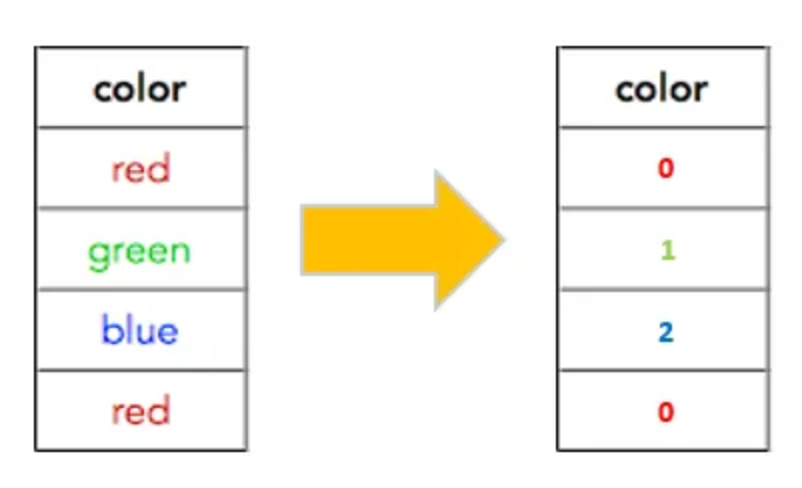

In [25]:
Image(filename="images/label encoding.png", width=300, height=200)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convertir les valeurs des colonnes en chaînes de caractères
df_encoded['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].astype(str)
df_encoded['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].astype(str)



from sklearn.preprocessing import LabelEncoder
import numpy as np
import pickle

# Combiner les deux colonnes pour créer un encodage unique
airports = np.unique(df_encoded['ORIGIN_AIRPORT'] + df_encoded['DESTINATION_AIRPORT'])

# Créer un LabelEncoder pour les aéroports
airport_encoder = LabelEncoder()
airport_encoder.fit(airports)

# Encoder les colonnes
df_encoded['ORIGIN_AIRPORT'] = airport_encoder.transform(df_encoded['ORIGIN_AIRPORT'])
df_encoded['DESTINATION_AIRPORT'] = airport_encoder.transform(df_encoded['DESTINATION_AIRPORT'])




ValueError: y contains previously unseen labels: 'ANC'

### Selection des caractéristiques

In [ ]:
# Séparer les caractéristiques (X) et la variable cible (y)
X = df_encoded.drop(columns=['ARRIVAL_DELAY'])  # Toutes les colonnes sauf ARRIVAL_DELAY
y = df_encoded['ARRIVAL_DELAY']  # La variable cible



In [ ]:
from sklearn.model_selection import train_test_split

# Diviser l'ensemble de données en un ensemble d'entraînement et de test (80% / 20% )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement X: {X_train.shape}")
print(f"Taille de l'ensemble de test X: {X_test.shape}")
print(f"Taille de l'ensemble d'entraînement y: {y_train.shape}")
print(f"Taille de l'ensemble de test y: {y_test.shape}")


Taille de l'ensemble d'entraînement X: (4655263, 27)
Taille de l'ensemble de test X: (1163816, 27)
Taille de l'ensemble d'entraînement y: (4655263,)
Taille de l'ensemble de test y: (1163816,)


In [ ]:
#Save the training and testing data files to be used in testing later
df_train = pd.concat([X_train,y_train],axis=1)
df_test = pd.concat([X_test,y_test],axis=1)
df_train.to_csv("../data/train_data.csv",index=False)
df_test.to_csv("../data/test_data.csv",index=False)